In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [192]:
df1 = pd.read_csv("C:\\Users\\Maria Camila Corvach\\Documents\\Python\\Data_cleaning\\Customer_segmentation.csv")
df2 = pd.read_csv("C:\\Users\\Maria Camila Corvach\\Documents\\Python\\Data_cleaning\\Train_Customer_Segmentation.csv")

df = pd.concat([df1, df2], axis = 0)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [193]:
df.shape



(10695, 11)

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10695.0,463468.088640,2600.966411,458982.0,461220.5,463451.0,465733.5,467974.0
Age,10695.0,43.511828,16.774158,18.0,30.0,41.0,53.0,89.0
Work_Experience,9597.0,2.619777,3.390790,0.0,0.0,1.0,4.0,14.0
Family_Size,10247.0,2.844052,1.536427,1.0,2.0,3.0,4.0,9.0


In [195]:
df.Var_1.value_counts() # pediente countplot

Var_1
Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: count, dtype: int64

In [196]:
df.Var_1.isnull().sum()

108

In [197]:
df.Profession.value_counts()

Profession
Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: count, dtype: int64

In [198]:
df.Profession.isnull().sum()

162

In [199]:
df.drop(df.index[df.Profession.isnull()], inplace=True)
df.drop(df.index[df.Var_1.isnull()], inplace= True)
df.shape
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C


In [200]:
#prediciendo valores faltantes para Ever_Married
for row in df.iterrows():
    if pd.isna(row[1]['Ever_Married']):
        age = row[1]['Age']
        id_ = row[1]['ID']
        value = df.loc[df.Age == age, 'Ever_Married'].value_counts().index[0]
        df.loc[df.ID == id_, 'Ever_Married'] = value

In [201]:
#preciendo los valores faltantes para Graduated
for row in df.iterrows():
    if pd.isna(row[1]['Graduated']):
        age = row[1]['Age']
        id_ = row[1]['ID']
        value = df.loc[df.Age == age, 'Graduated'].value_counts().index[0]
        df.loc[df.ID == id_, 'Graduated'] = value

In [202]:
#prediciendo los valores de Work_Expirience

for row in df.iterrows():
    if pd.isna(row[1]['Work_Experience']):
        age = row[1]['Age']
        id_ = row[1]['ID']
        value = df.loc[df.Age == age, 'Work_Experience'].value_counts().index[0]
        df.loc[df.ID == id_, 'Work_Experience'] = value

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10295 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10295 non-null  int64  
 1   Gender           10295 non-null  object 
 2   Ever_Married     10295 non-null  object 
 3   Age              10295 non-null  int64  
 4   Graduated        10295 non-null  object 
 5   Profession       10295 non-null  object 
 6   Work_Experience  10295 non-null  float64
 7   Spending_Score   10295 non-null  object 
 8   Family_Size      9883 non-null   float64
 9   Var_1            10295 non-null  object 
 10  Segmentation     10295 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 965.2+ KB


In [204]:
#prediciendo valores de "Size family"
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(df.Family_Size.values.reshape(-1,1))

SimpleImputer(strategy='median')

In [205]:
df['Family_Size'] = imputer.transform(df.Family_Size.values.reshape(-1,1))

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10295 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10295 non-null  int64  
 1   Gender           10295 non-null  object 
 2   Ever_Married     10295 non-null  object 
 3   Age              10295 non-null  int64  
 4   Graduated        10295 non-null  object 
 5   Profession       10295 non-null  object 
 6   Work_Experience  10295 non-null  float64
 7   Spending_Score   10295 non-null  object 
 8   Family_Size      10295 non-null  float64
 9   Var_1            10295 non-null  object 
 10  Segmentation     10295 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 965.2+ KB


In [207]:
#Revisando duplicados
df['ID'].duplicated().sum()


2188

In [208]:
duplicados = df['ID'].value_counts()
duplicados = duplicados[duplicados > 1]
print(duplicados)

ID
458989    2
464683    2
464756    2
464758    2
464760    2
         ..
461845    2
461862    2
461326    2
461335    2
461848    2
Name: count, Length: 2188, dtype: int64


In [209]:
df = df.drop_duplicates(subset='ID', keep='first')
df.shape

(8107, 11)

In [210]:
#Categorizando las edades
bin_edges = [0, 18, 24, 34, 44, 54, 64, 100]
bin_labels = ['-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65+']
df.loc[:, 'Age_Group'] = pd.cut(df['Age'], bins = bin_edges, labels = bin_labels, right = True)
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B,35-44
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A,35-44
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B,55-64
4,459001,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6,A,19-24
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C,45-54
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D,55-64
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6,D,45-54
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6,B,45-54
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6,B,19-24
10,459015,Male,No,22,No,Healthcare,0.0,Low,3.0,Cat_6,D,19-24


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8107 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               8107 non-null   int64   
 1   Gender           8107 non-null   object  
 2   Ever_Married     8107 non-null   object  
 3   Age              8107 non-null   int64   
 4   Graduated        8107 non-null   object  
 5   Profession       8107 non-null   object  
 6   Work_Experience  8107 non-null   float64 
 7   Spending_Score   8107 non-null   object  
 8   Family_Size      8107 non-null   float64 
 9   Var_1            8107 non-null   object  
 10  Segmentation     8107 non-null   object  
 11  Age_Group        8107 non-null   category
dtypes: category(1), float64(2), int64(2), object(7)
memory usage: 768.3+ KB


# Data Visualization

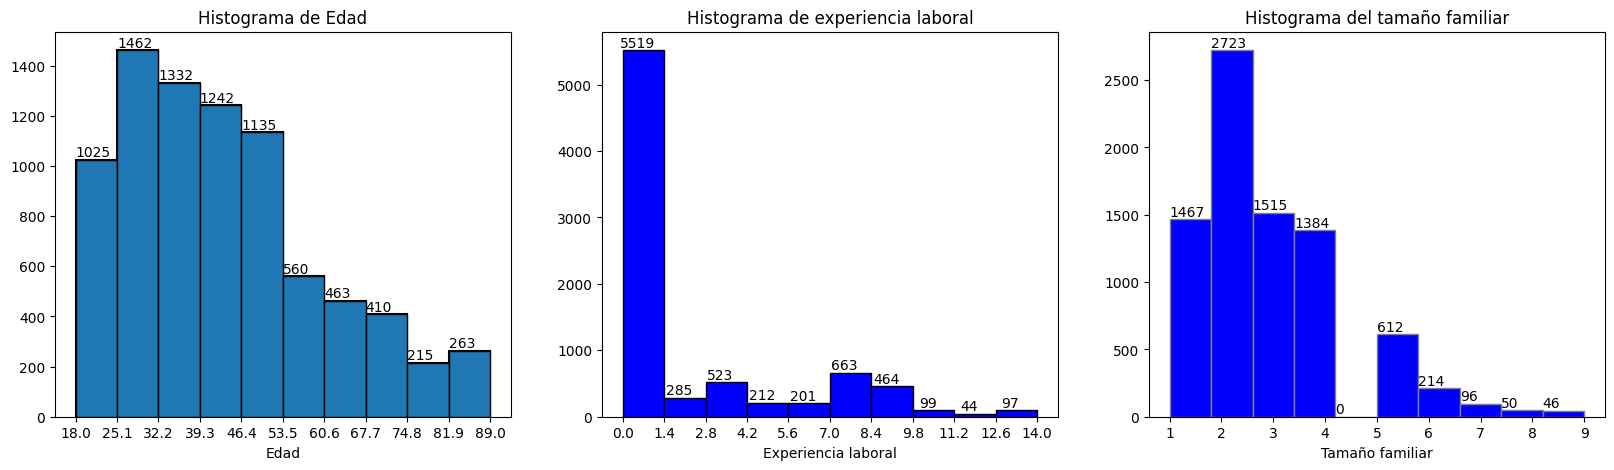

In [213]:
fig = plt.figure(figsize=(20,5))

#Subplot para la edad con Matplotlib
age = fig.add_subplot(131) #se crea el especio y se selecciona la segunda posición
age.hist(df['Age'], bins = 10, color='blue',  histtype='bar', edgecolor = 'black', linewidth = 1.5)
age.set_xlabel('Edad')
age.set_title('Histograma de Edad')
counts, bins, _ = age.hist(df['Age'], bins = 10, edgecolor = 'black')
plt.xticks(bins)
for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), ha = 'left', va='bottom')

#Subplot para experiencia laboral con Matplotlib
work_exp = fig.add_subplot(132)
work_exp.hist(df['Work_Experience'], bins =10, color='blue', edgecolor='black')
work_exp.set_xlabel('Experiencia laboral')
work_exp.set_title('Histograma de experiencia laboral')
counts, bins= np.histogram(df['Work_Experience'], bins = 10)
plt.xticks(bins)
for i, count in enumerate(counts):
    plt.annotate(str(count), xy = (bins[i]+0.5, count), ha = 'center', va = 'bottom')

#Subplot para tamaño familiar
family_size = fig.add_subplot(133)
family_size.hist(df['Family_Size'], bins = 10, color= 'blue', edgecolor = 'gray')
family_size.set_xlabel('Tamaño familiar')
family_size.set_title('Histograma del tamaño familiar')
counts, bins = np.histogram(df['Family_Size'], bins = 10)

for i, count in enumerate(counts):
    plt.annotate(str(int(count)), xy = (bins[i], count), ha = 'left', va = 'bottom')
    
plt.show()


In [214]:
#Histograma de edad con Seaborn
"""sns.histplot(data = df, x = 'Age', bins= 10, kde = True, stat = 'count') #Creando el gráfico
counts, bins = np.histogram(df['Age'], bins = 10) #obteniendo el conteo por bin y sus límites
plt.xticks(bins) #Cambiando escala del eje por los límites de los bins
for i, count in enumerate(counts): #Anotando la etiqueta a cada bin
    plt.annotate(str(count), xy = (bins[i], count), ha = 'left', va = 'bottom')
plt.xlabel('Edad')
plt.title('Histograma de edad')
plt.show()"""


"sns.histplot(data = df, x = 'Age', bins= 10, kde = True, stat = 'count') #Creando el gráfico\ncounts, bins = np.histogram(df['Age'], bins = 10) #obteniendo el conteo por bin y sus límites\nplt.xticks(bins) #Cambiando escala del eje por los límites de los bins\nfor i, count in enumerate(counts): #Anotando la etiqueta a cada bin\n    plt.annotate(str(count), xy = (bins[i], count), ha = 'left', va = 'bottom')\nplt.xlabel('Edad')\nplt.title('Histograma de edad')\nplt.show()"

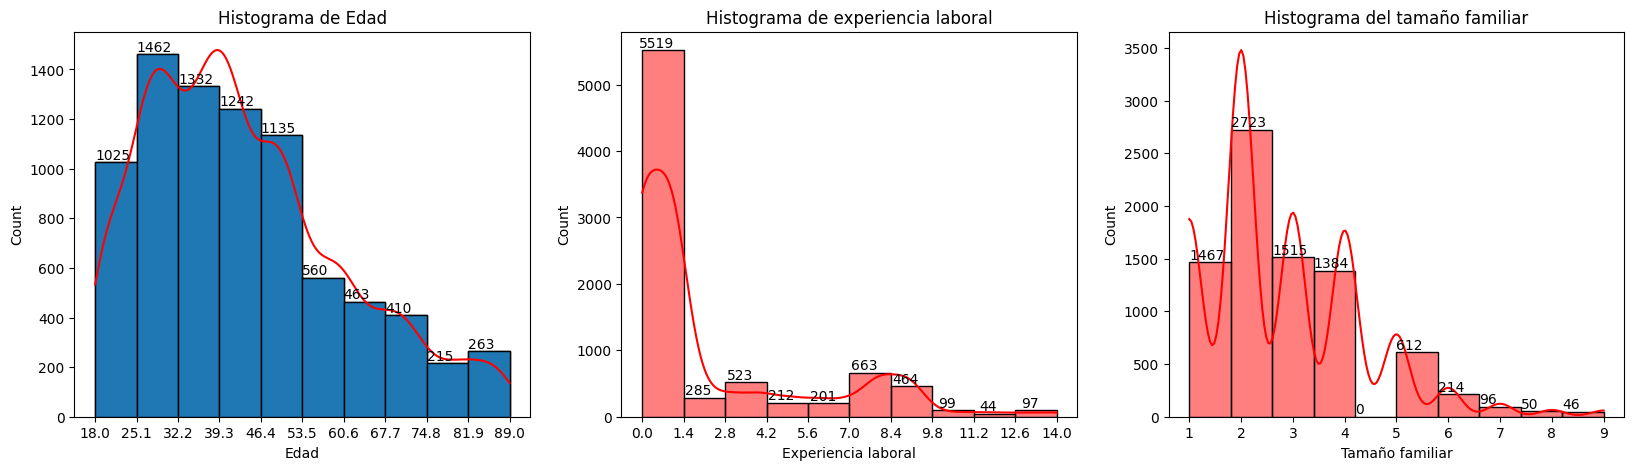

In [215]:
#Graficando subplots con plt e histograma con sns
fig = plt.figure(figsize=(20,5))

#Subplot para la edad con Matplotlib
age = fig.add_subplot(131) #se crea el especio y se selecciona la segunda posición
sns.histplot(data = df, x = 'Age', bins= 10, kde = True, stat = 'count', color='red') #Creando el gráfico
age.set_xlabel('Edad')
age.set_title('Histograma de Edad')
counts, bins, _ = age.hist(df['Age'], bins = 10, edgecolor = 'black')
plt.xticks(bins)
for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), ha = 'left', va='bottom')

#Subplot para experiencia laboral con Matplotlib
work_exp = fig.add_subplot(132)
sns.histplot(data = df, x = 'Work_Experience', bins= 10, kde = True, stat = 'count', color='red') #Creando el gráfico
work_exp.set_xlabel('Experiencia laboral')
work_exp.set_title('Histograma de experiencia laboral')
counts, bins= np.histogram(df['Work_Experience'], bins = 10)
plt.xticks(bins)
for i, count in enumerate(counts):
    plt.annotate(str(count), xy = (bins[i]+0.5, count), ha = 'center', va = 'bottom')

#Subplot para tamaño familiar
family_size = fig.add_subplot(133)
sns.histplot(data = df, x = 'Family_Size', bins= 10, kde = True, stat = 'count', color='red') #Creando el gráfico
family_size.set_xlabel('Tamaño familiar')
family_size.set_title('Histograma del tamaño familiar')
counts, bins = np.histogram(df['Family_Size'], bins = 10)

for i, count in enumerate(counts):
    plt.annotate(str(int(count)), xy = (bins[i], count), ha = 'left', va = 'bottom')
    
plt.show()

In [216]:
#Graficando la segmentación vs otras variables

def diag_bar_apiladas(df, col1, col2, tittle):
    grouped = df.groupby([col1, col2]).size().unstack()
    ax = grouped.plot(kind = 'bar', stacked = True, edgecolor = 'black')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    
    plt.xlabel(col1)
    plt.ylabel('Frecuencia')
    plt.title(tittle)
    plt.show()
        

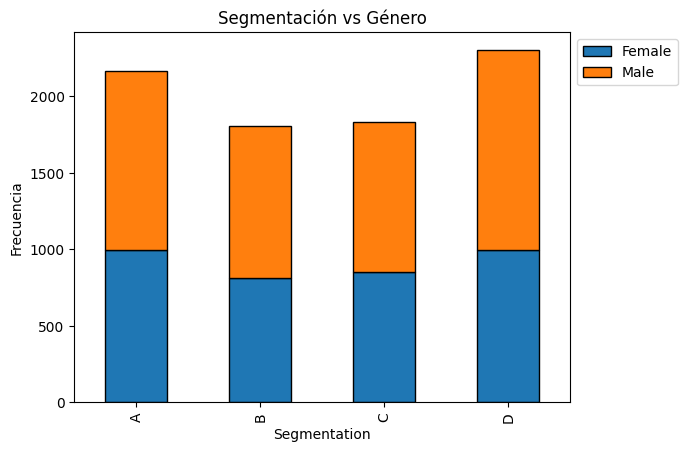

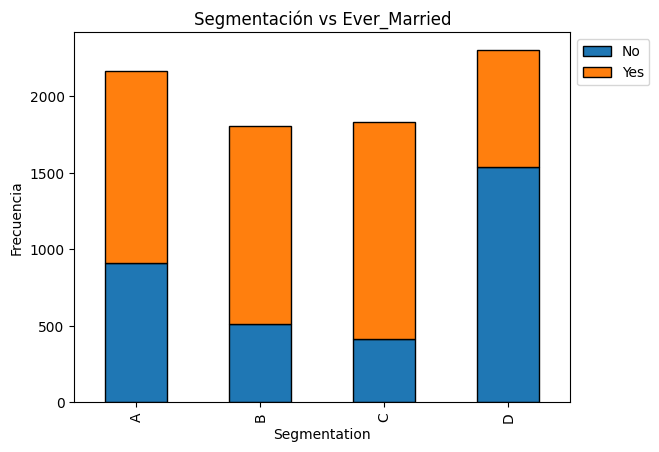

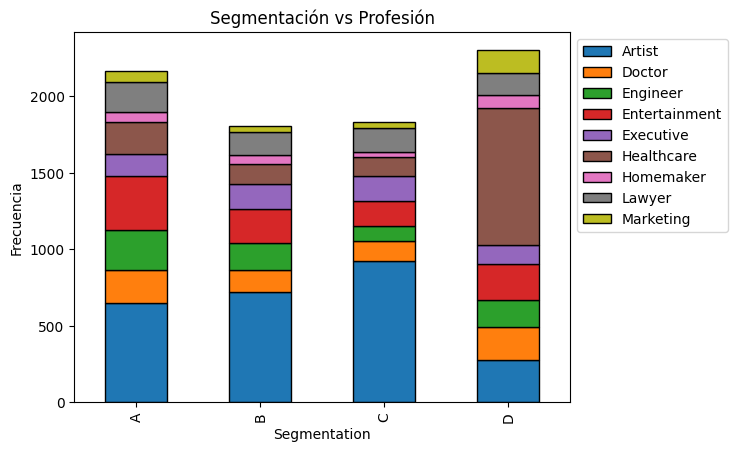

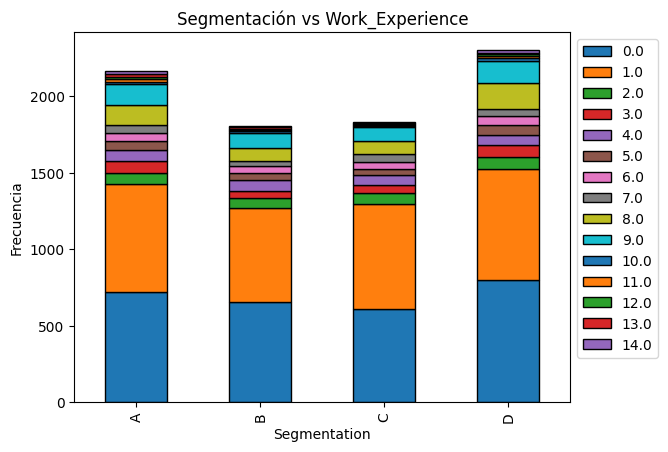

C:\Users\Maria Camila Corvach\AppData\Local\Temp\ipykernel_17368\951968555.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([col1, col2]).size().unstack()


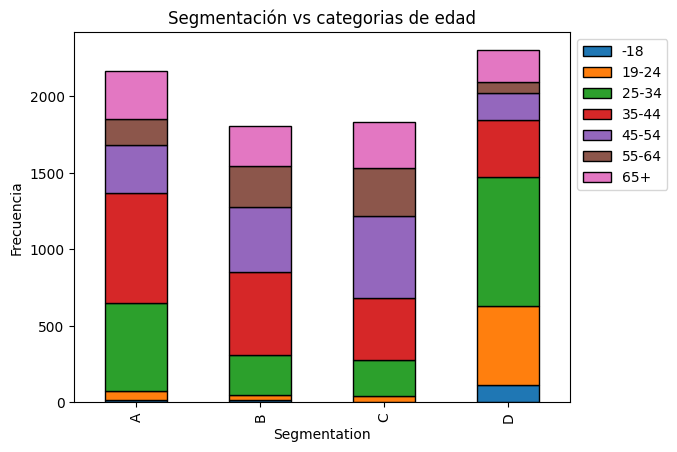

C:\Users\Maria Camila Corvach\AppData\Local\Temp\ipykernel_17368\951968555.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([col1, col2]).size().unstack()


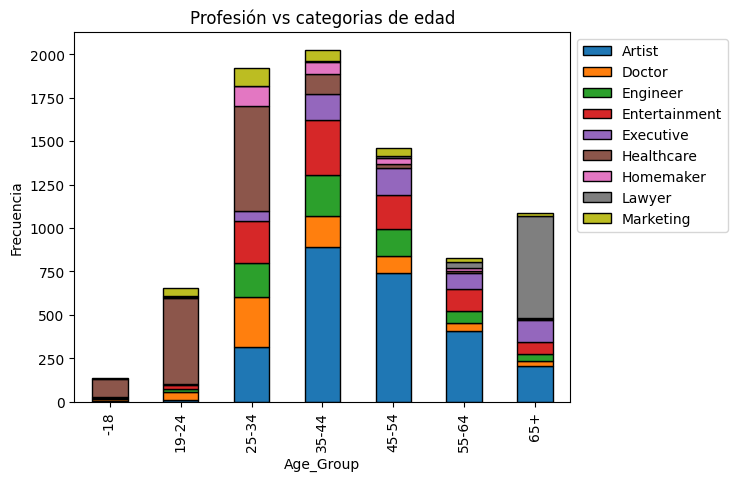

In [219]:
diag_bar_apiladas(df, 'Segmentation', 'Gender', 'Segmentación vs Género')
diag_bar_apiladas(df, 'Segmentation', 'Ever_Married', 'Segmentación vs Ever_Married')
diag_bar_apiladas(df, 'Segmentation', 'Profession', 'Segmentación vs Profesión')
diag_bar_apiladas(df, 'Segmentation', 'Work_Experience', 'Segmentación vs Work_Experience')
diag_bar_apiladas(df, 'Segmentation', 'Age_Group', 'Segmentación vs categorias de edad')
diag_bar_apiladas(df, 'Age_Group', 'Profession' , 'Profesión vs categorias de edad')